In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tifffile

In [2]:
work_path = '/home/user3/work/data/by_z_regression/minsk_t/6'
image_path = os.path.join(work_path, 'rgb.tif')
mask_path = os.path.join(work_path, 'query.tif')

known_path = os.path.join(work_path, 'known_dataset')
unknown_path = os.path.join(work_path, 'unknown_dataset')

if not os.path.exists(known_path):
    os.mkdir(known_path)
if not os.path.exists(unknown_path):
    os.mkdir(unknown_path)

image_prefix = 'i_'
mask_prefix = 'm_'

border_size = 160

unknown_level_value = 255

In [3]:
mask = tifffile.imread(mask_path)
mh, mw = mask.shape
_, labels, itmes_stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=4)
itmes_labels, itmes_stats = labels[1:], itmes_stats[1:]

mode_name_crop_list = []
error_count = 0
for n, stats in tqdm.tqdm(enumerate(zip(itmes_stats), start=1)):
    try:
        left, top, width, height, area = stats[0]
        h1, w1, h2, w2 = top, left, top + height, left + width
        h1 = 0 if (h1 - border_size) < 0 else (h1 - border_size)
        w1 = 0 if (w1 - border_size) < 0 else (w1 - border_size)
        h2 = mh if (h2 + border_size) > mh else (h2 + border_size)
        w2 = mw if (w2 + border_size) > mw else (w2 + border_size)

        # item_image = image[h1:h2, w1:w2, :]
        item_mask = mask[h1:h2, w1:w2] * (itmes_labels[h1:h2, w1:w2] == n)
        level = np.max(item_mask)
        if level < 1:
            print('Level is 0')
            continue
        if np.sum(item_mask) == 0:
            print('No mask data')
            continue
            
        name = "{}-{}-{}-{}-{}".format(str(h1), str(h2), str(w1), str(w2), str(level))
        
        item_mask
        
        if level == unknown_level_value:
            mode_name_crop_list.append(('u', name, (h1,h2, w1,w2)))
            cv2.imwrite(os.path.join(unknown_path, mask_prefix + name + '.tif'), item_mask)
        else:
            mode_name_crop_list.append(('k', name, (h1,h2, w1,w2)))
            cv2.imwrite(os.path.join(known_path, mask_prefix + name + '.tif'), item_mask)

    except Exception as e:
        error_count +=1
        print(e)
        
del mask
del labels
del itmes_stats
print('Error', error_count, ', success', len(mode_name_crop_list))
print('Finished!')

1405it [00:01, 1080.62it/s]

Level is 0
Level is 0


1730it [00:01, 1015.81it/s]

Level is 0


2235it [00:02, 950.37it/s] 

Level is 0
Level is 0
Level is 0
Level is 0
Level is 0
Level is 0
Level is 0


2683it [00:02, 843.64it/s]

Level is 0


3753it [00:03, 1122.46it/s]

Level is 0


4673it [00:04, 973.51it/s] 

Level is 0
Level is 0


5137it [00:04, 1120.59it/s]

Level is 0
Level is 0


6450it [00:06, 1026.86it/s]

Level is 0
Level is 0
Level is 0
Level is 0
Level is 0
Level is 0
Level is 0
Level is 0
Level is 0


7240it [00:06, 1161.14it/s]

Level is 0
operands could not be broadcast together with shapes (552,972) (551,972) 
operands could not be broadcast together with shapes (488,556) (487,556) 
operands could not be broadcast together with shapes (402,576) (401,576) 
operands could not be broadcast together with shapes (389,499) (388,499) 
operands could not be broadcast together with shapes (364,402) (363,402) 
operands could not be broadcast together with shapes (357,423) (356,423) 


7426it [00:06, 1074.57it/s]

operands could not be broadcast together with shapes (354,367) (353,367) 
operands could not be broadcast together with shapes (352,441) (351,441) 
operands could not be broadcast together with shapes (347,361) (346,361) 
operands could not be broadcast together with shapes (345,400) (344,400) 
operands could not be broadcast together with shapes (341,352) (340,352) 
operands could not be broadcast together with shapes (340,360) (339,360) 
operands could not be broadcast together with shapes (339,344) (338,344) 
operands could not be broadcast together with shapes (336,442) (335,442) 
operands could not be broadcast together with shapes (335,351) (334,351) 
operands could not be broadcast together with shapes (335,348) (334,348) 
operands could not be broadcast together with shapes (333,445) (332,445) 
operands could not be broadcast together with shapes (333,346) (332,346) 
operands could not be broadcast together with shapes (331,348) (330,348) 
operands could not be broadcast togeth

In [4]:
image = tifffile.imread(image_path)
ih, iw, ic = image.shape

for mode, name, (h1,h2, w1,w2) in tqdm.tqdm(mode_name_crop_list):
    try:
        item_image = image[h1:h2, w1:w2, :]

        if mode == 'u':
            cv2.imwrite(os.path.join(unknown_path, image_prefix + name + '.tif'), item_image)
        else:
            cv2.imwrite(os.path.join(known_path, image_prefix + name + '.tif'), item_image)
    except Exception as e:
        print(e)

100%|██████████████████████████████████████| 7232/7232 [00:47<00:00, 151.80it/s]


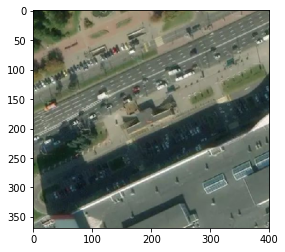

1


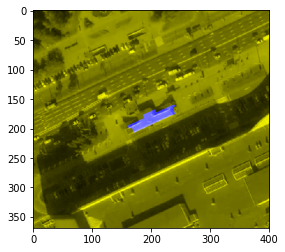

In [5]:
output_path = known_path

dataset_items = [fn[len(mask_prefix): ] for fn in os.listdir(output_path)
                  if os.path.isfile(os.path.join(output_path, fn)) and fn.startswith(mask_prefix)]


random_item = random.choice(dataset_items)

item_image_path = os.path.join(output_path, image_prefix + random_item)
itme_image = cv2.imread(item_image_path)

item_mask_path = os.path.join(output_path, mask_prefix + random_item)
item_mask = cv2.imread(item_mask_path)

plt.imshow(itme_image)
plt.show()
print(np.max(item_mask))
plt.imshow(np.stack([itme_image[..., 1], itme_image[..., 1], (item_mask[..., 1] > 0) * 255], axis=-1))
plt.show()